In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/GhazalDataset.zip

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install -U tensorflow==2.8.2

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./GhazalDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,ای باد بی‌آرام ما با گل بگو پیغام ما کای گل گ...,moulavi
1,ای گشته ز شاه عشق شهمات در خشم مباش و در مکاف...,moulavi
2,آخر بشنید آن مه آه سحر ما را تا حشر دگر آمد ا...,moulavi
3,گویم سخن شکرنباتت یا قصه چشمه حیاتت رخ بر رخ...,moulavi
4,اسیر شیشه کن آن جنیان دانا را بریز خون دل آن ...,moulavi
...,...,...
2426,کاروانی شکر از مصر به شیراز آید اگر آن یار سف...,saadi
2427,چه دل‌ها بردی ای ساقی به ساق فتنه‌انگیزت دریغ...,saadi
2428,دوش دور از رویت ای جان جانم از غم تاب داشت اب...,saadi
2429,عشقبازی نه من آخر به جهان آوردم یا گناهیست که...,saadi


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,ای باد بی آرام ما با گل بگو پیغام ما کای گل گر...,moulavi
1,ای گشته ز شاه عشق شهمات در خشم مباش و در مکافا...,moulavi
2,آخر بشنید آن مه آه سحر ما را تا حشر دگر آمد ام...,moulavi
3,گویم سخن شکرنباتت یا قصه چشمه حیاتت رخ بر رخ م...,moulavi
4,اسیر شیشه کن آن جنیان دانا را بریز خون دل آن خ...,moulavi
...,...,...
2426,کاروانی شکر از مصر به شیراز آید اگر آن یار سفر...,saadi
2427,چه دل ها بردی ای ساقی به ساق فتنه انگیزت دریغا...,saadi
2428,دوش دور از رویت ای جان جانم از غم تاب داشت ابر...,saadi
2429,عشقبازی نه من آخر به جهان آوردم یا گناهیست که ...,saadi


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,گل پیغام کای گل گریز شکر گشتی گلشن گل اصل شکری...,moulavi
1,شاه عشق شهمات خشم مباش مکافات باغ فنا درآ بنگر...,moulavi
2,بشنید مه آه سحر حشر حشر چرخ زند مه سینه دور قم...,moulavi
3,سخن شکرنباتت قصه چشمه حیاتت رخ رخ نهی شاه ماتت...,moulavi
4,اسیر شیشه جنیان دانا بریز خون دل خونیان صهبا ر...,moulavi
...,...,...
2426,کاروانی شکر مصر شیراز یار سفرکرده بازآید بازآی...,saadi
2427,دل بردی ساقی ساق فتنه انگیزت بوسه چندی زنخدان ...,saadi
2428,دوش دور رویت جان جانم غم تاب ابر چشمم رخ سودای...,saadi
2429,عشقبازی جهان آوردم گناهیست مسکین دل خبری غم دل...,saadi


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,گل پیغام کای گل گریز شکر گشتی گلشن گل اصل شکری...,moulavi
1,شاه عشق شهمات خشم مباش مکافات باغ فنا درآ بنگر...,moulavi
2,بشنید مه آه سحر حشر حشر چرخ زند مه سینه دور قم...,moulavi
3,سخن شکرنباتت قصه چشمه حیاتت رخ رخ نهی شاه ماتت...,moulavi
4,اسیر شیشه جنیان دانا بریز خون دل خونیان صهبا ر...,moulavi
...,...,...
2426,کاروانی شکر مصر شیراز یار سفرکرده بازآید بازآی...,saadi
2427,دل بردی ساقی ساق فتنه انگیزت بوسه چندی زنخدان ...,saadi
2428,دوش دور رویت جان جانم غم تاب ابر چشمم رخ سودای...,saadi
2429,عشقبازی جهان آوردم گناهیست مسکین دل خبری غم دل...,saadi


moulavi    501
attar      500
saadi      500
hafez      495
sanaee     435
Name: poet, dtype: int64


<Axes: >

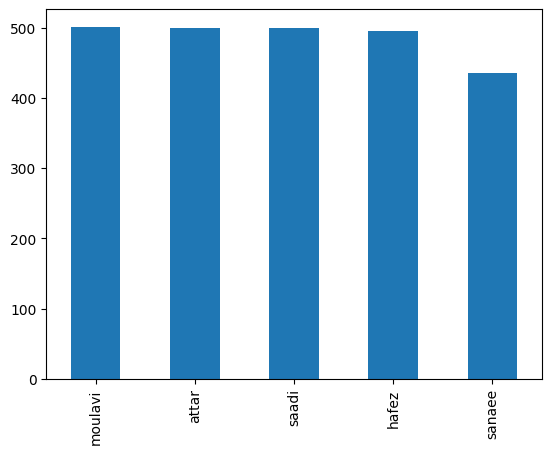

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['attar', 'hafez', 'moulavi', 'saadi', 'sanaee']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,گل پیغام کای گل گریز شکر گشتی گلشن گل اصل شکری...,moulavi,2
1,شاه عشق شهمات خشم مباش مکافات باغ فنا درآ بنگر...,moulavi,2
2,بشنید مه آه سحر حشر حشر چرخ زند مه سینه دور قم...,moulavi,2
3,سخن شکرنباتت قصه چشمه حیاتت رخ رخ نهی شاه ماتت...,moulavi,2
4,اسیر شیشه جنیان دانا بریز خون دل خونیان صهبا ر...,moulavi,2
...,...,...,...
2426,کاروانی شکر مصر شیراز یار سفرکرده بازآید بازآی...,saadi,3
2427,دل بردی ساقی ساق فتنه انگیزت بوسه چندی زنخدان ...,saadi,3
2428,دوش دور رویت جان جانم غم تاب ابر چشمم رخ سودای...,saadi,3
2429,عشقبازی جهان آوردم گناهیست مسکین دل خبری غم دل...,saadi,3


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'attar': 0, 'hafez': 1, 'moulavi': 2, 'saadi': 3, 'sanaee': 4}
id2label: {0: 'attar', 1: 'hafez', 2: 'moulavi', 3: 'saadi', 4: 'sanaee'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoConfig, AutoTokenizer

MODEL_NAME = 'HooshvareLab/bert-fa-base-uncased'
config = AutoConfig.from_pretrained(
    MODEL_NAME, **{
        'label2id': label2id,
        'id2label': id2label,
    })
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

max:  497
min:  20


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

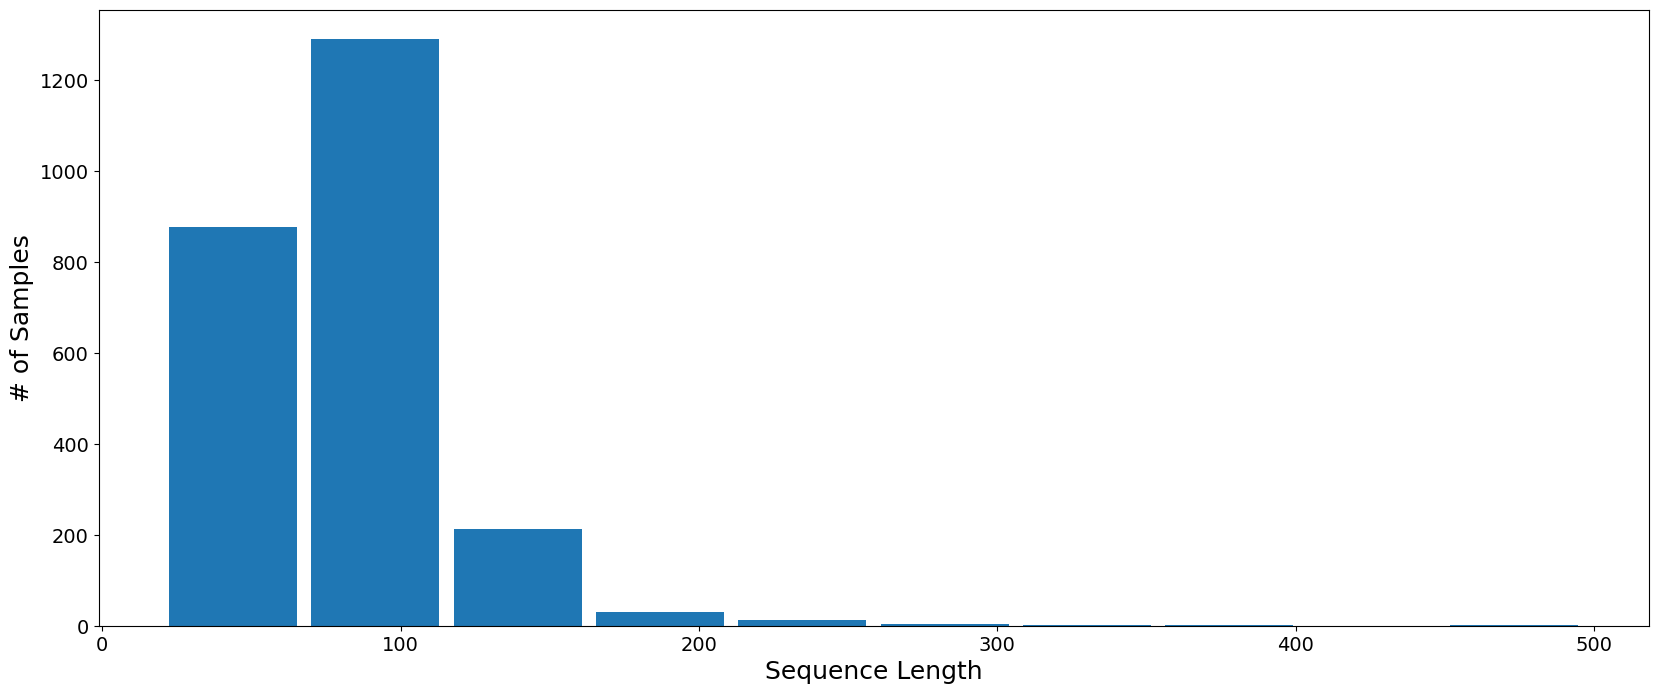

In [ ]:
# tokenize the text feature
tokenized_feature_raw = tokenizer.batch_encode_plus(
                            # Sentences to encode
                            df.poem.values.tolist(),
                            # Add '[CLS]' and '[SEP]'
                            add_special_tokens = True
                   )
# collect tokenized sentence length
token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [ ]:
print(config.to_json_string())

{
  "_name_or_path": "HooshvareLab/bert-fa-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "attar",
    "1": "hafez",
    "2": "moulavi",
    "3": "saadi",
    "4": "sanaee"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "attar": 0,
    "hafez": 1,
    "moulavi": 2,
    "saadi": 3,
    "sanaee": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



In [ ]:
SEQ_LEN = 256
BATCH_SIZE = 32

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
# y_valid_le  = le.fit_tranform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
test_labels = to_categorical(y_test_le)
# val_labels = to_categorical(y_valid_le)

In [ ]:
y_valid_le  = le.fit_transform(val_data['label_id'])
val_labels = to_categorical(y_valid_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)

train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFAutoModel, TFBertForSequenceClassification
base_model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')
classificationResult = base_model([input_ids, mask]).logits
Final_output = tf.keras.layers.Dense(5, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_for_sequence_class  TFSequenceClassifierOutput   1628451   ['input_ids[0][0]',           
 ification (TFBertForSequen  (loss=None, logits=(None,    89         'attention_mask[0][0]']      
 ceClassification)           5),                                                              

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #learning_rate=1e-4, decay=1e-6
loss= tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
60/60 [==============================] - 149s 2s/step - loss: 1.1512 - accuracy: 0.5604 - val_loss: 0.4620 - val_accuracy: 0.9207
Epoch 2/5
60/60 [==============================] - 101s 2s/step - loss: 0.3631 - accuracy: 0.9146 - val_loss: 0.1972 - val_accuracy: 0.9471
Epoch 3/5
60/60 [==============================] - 103s 2s/step - loss: 0.1394 - accuracy: 0.9734 - val_loss: 0.1318 - val_accuracy: 0.9639
Epoch 4/5
60/60 [==============================] - 101s 2s/step - loss: 0.0588 - accuracy: 0.9896 - val_loss: 0.1296 - val_accuracy: 0.9663
Epoch 5/5
60/60 [==============================] - 104s 2s/step - loss: 0.0496 - accuracy: 0.9922 - val_loss: 0.2359 - val_accuracy: 0.9423


In [ ]:
final_accuracy = history.history['val_accuracy']

print('FINAL ACCURACY: ', np.mean(final_accuracy))

FINAL ACCURACY:  0.9480769157409668


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

1/1 [==============================] - 1s 624ms/step - loss: 0.5241 - accuracy: 0.8750


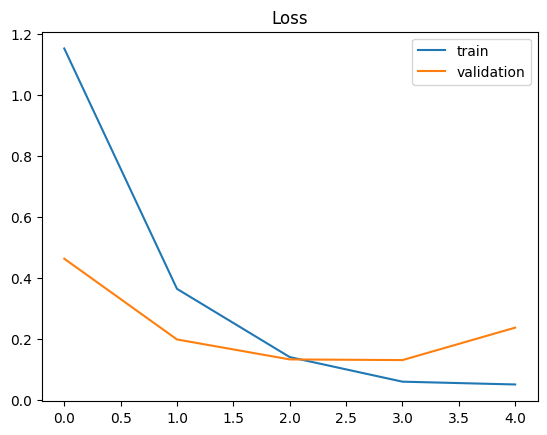

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

              precision    recall  f1-score   support

       attar       1.00      1.00      1.00        10
       hafez       1.00      1.00      1.00        11
     moulavi       0.83      0.50      0.62        10
       saadi       1.00      1.00      1.00         7
      sanaee       0.67      0.91      0.77        11

    accuracy                           0.88        49
   macro avg       0.90      0.88      0.88        49
weighted avg       0.89      0.88      0.87        49



<Axes: >

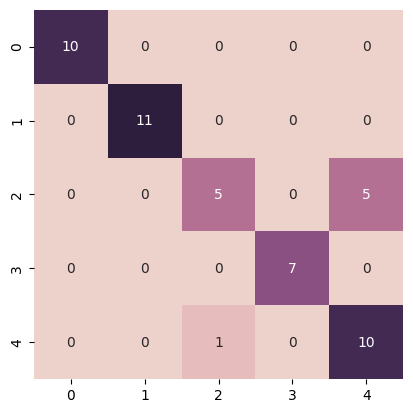

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)